<a href="https://colab.research.google.com/github/parthh03/Air-Quality-prediction/blob/main/Air_pollution_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# Provide the file path without extra double quotes
file_path = "Air_pollution.csv"

# Load the CSV file into a DataFrame
data_df = pd.read_csv(file_path, index_col=0)

# Display the first few rows of the DataFrame
data_df.head()


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
data_df['datetime'] = pd.to_datetime(data_df[['year', 'month','day', 'hour']])
data_df = data_df.drop(['year', 'month','day', 'hour'], axis = 1)

data_df = data_df[['datetime', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']].iloc[24:].reset_index().drop('No', axis = 1)
data_df[['pm2.5']] = data_df[['pm2.5']].interpolate(method='linear')


In [12]:
data_df.isnull().sum()

datetime    0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
pm2.5       0
dtype: int64

In [13]:
len(data_df)

43800

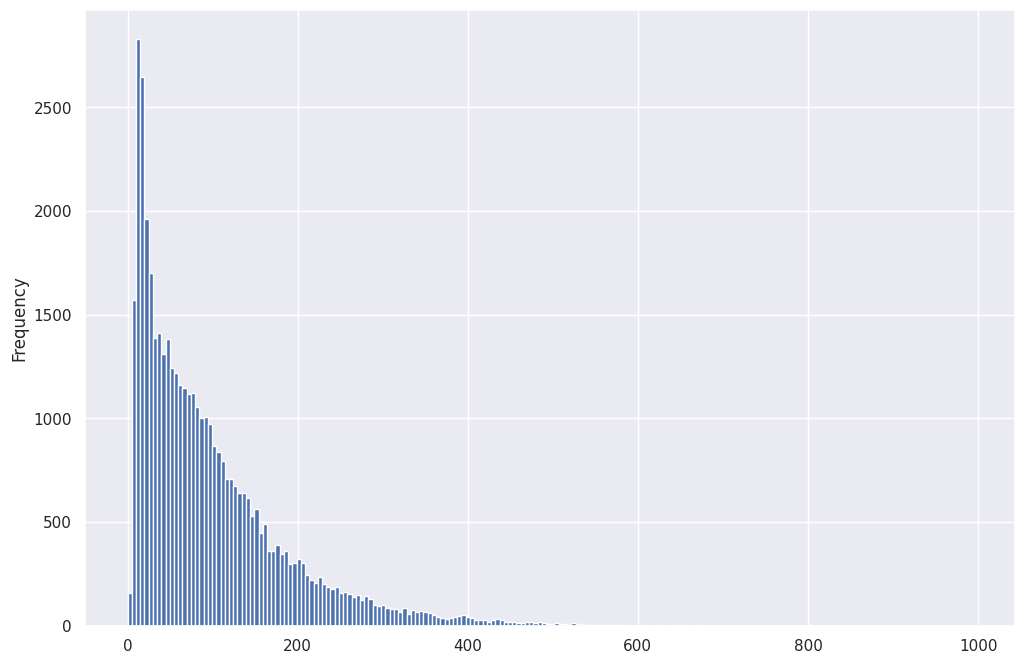

In [14]:
ax = data_df['pm2.5'].plot.hist(bins = 200, figsize = (12,8))

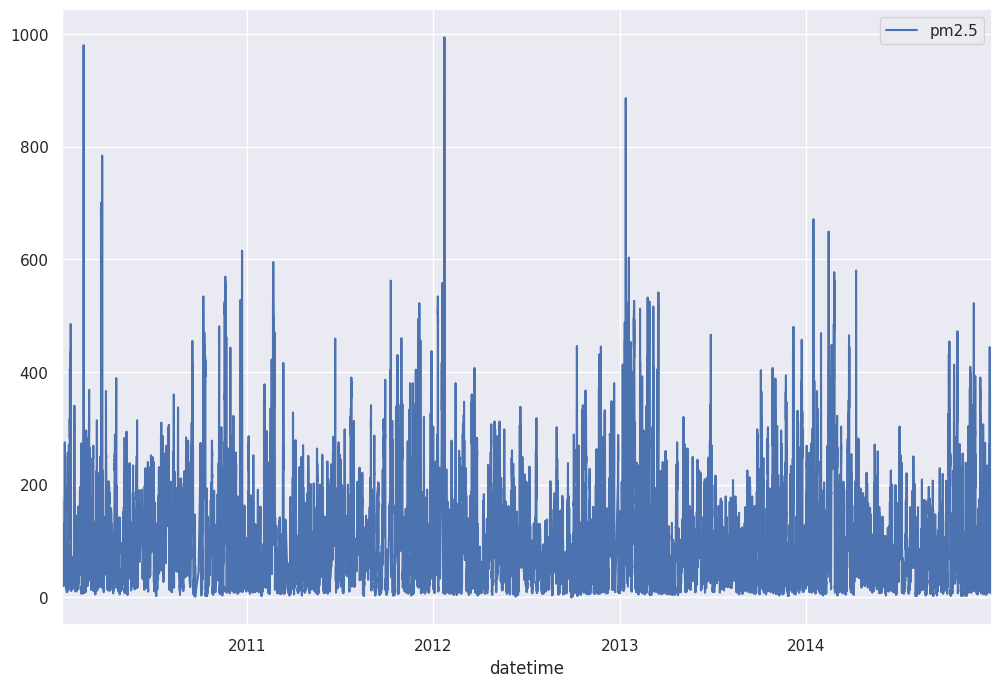

In [15]:
ax = data_df.plot(x = 'datetime', y = 'pm2.5', figsize = (12,8))

In [16]:
data_df[['pm2.5']].mean()

pm2.5    98.244966
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

data_df = data_df.set_index('datetime')
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']], data_df[['pm2.5']], test_size=0.2)

In [18]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          1.035e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:32:44   Log-Likelihood:                     -2.0354e+05
No. Observations:               35040   AIC:                                  4.071e+05
Df Residuals:                   35034   BIC:                                  4.071e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = results.predict(np.asarray(X_test))
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)


79.09863288788789


In [20]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'6hr_avg':[sum(data_df['pm2.5'].iloc[i:i+6])/6]}, index = [i+6])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'12hr_avg':[sum(data_df['pm2.5'].iloc[i:i+12])/12]}, index = [i+12])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'24hr_avg':[sum(data_df['pm2.5'].iloc[i:i+24])/24]}, index = [i+24])])

data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)

data_df = pd.merge(data_df,pd.get_dummies(data_df['cbwd']), left_index=True, right_index=True)



In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          3.262e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        23:38:40   Log-Likelihood:                     -1.7748e+05
No. Observations:               35020   AIC:                                  3.550e+05
Df Residuals:                   35008   BIC:                                  3.551e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
y_pred = results.predict(np.asarray(X_test))

mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)


36.54711971695055


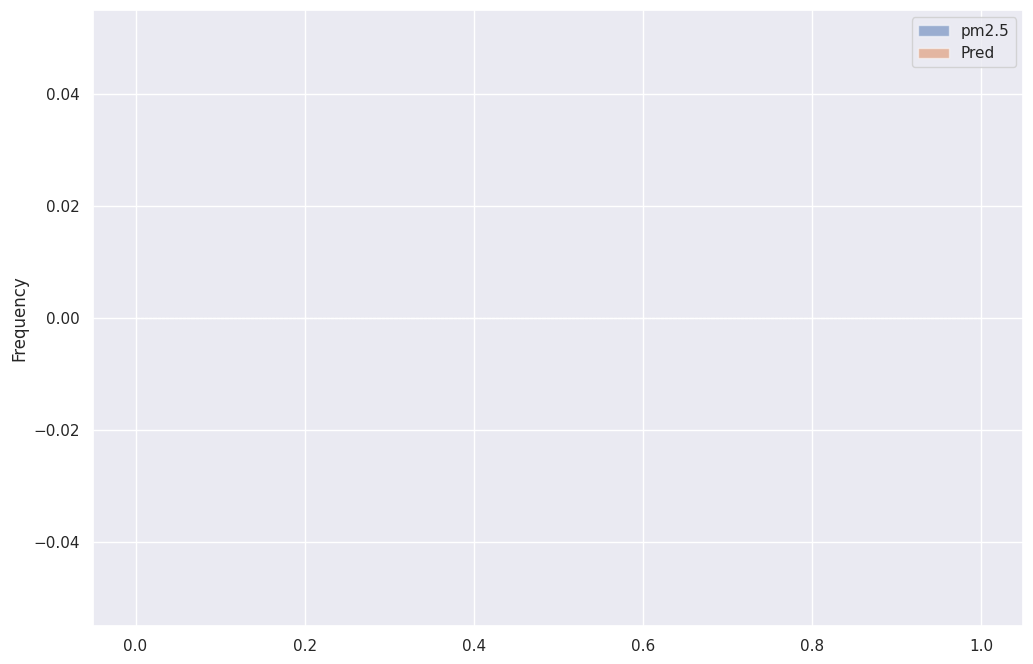

In [23]:
comp_df = pd.merge(y_test,pd.DataFrame({'Pred':y_pred}, index = [y_test.index]), left_index=True, right_index=True)
ax = comp_df.plot.hist(bins= 200, alpha = 0.5, figsize=(12,8))

In [26]:
from sklearn import tree
data_df = data_df.reset_index()
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)

In [27]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.asarray(X_train), np.asarray(y_train))

In [28]:
y_pred = clf.predict(np.asarray(X_test))

In [29]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

48.58591855381958


In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert feature names to a list of strings
feature_names = X_train.columns.tolist()

# Create DMatrix for the training and test data
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

param = {'verbosity': 1,
         'objective': 'reg:squarederror',     # 'reg:squarederror' for regression
         'booster': 'gblinear',
         'eval_metric': 'rmse',
         'feature_selector': 'cyclic',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]

In [32]:
num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:53.20084
[1]	train-rmse:46.21273
[2]	train-rmse:43.73740
[3]	train-rmse:42.69732
[4]	train-rmse:42.07465
[5]	train-rmse:41.44724
[6]	train-rmse:40.89553
[7]	train-rmse:40.41871
[8]	train-rmse:40.07270
[9]	train-rmse:39.82625
[10]	train-rmse:39.62243
[11]	train-rmse:39.44678
[12]	train-rmse:39.29234
[13]	train-rmse:39.15505
[14]	train-rmse:39.03163
[15]	train-rmse:38.91458
[16]	train-rmse:38.81799
[17]	train-rmse:38.73067
[18]	train-rmse:38.64169
[19]	train-rmse:38.57312


In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert feature names to a list of strings
feature_names = X_train.columns.tolist()

# Create DMatrix for the training and test data
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

param = {'verbosity': 1,
         'objective': 'reg:squarederror',     # 'reg:squarederror' for regression
         'booster': 'gblinear',
         'eval_metric': 'rmse',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]


In [35]:
num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:61.44346
[1]	train-rmse:47.62247
[2]	train-rmse:43.72851
[3]	train-rmse:42.12052
[4]	train-rmse:41.17612
[5]	train-rmse:40.52151
[6]	train-rmse:40.04919
[7]	train-rmse:39.70764
[8]	train-rmse:39.45691
[9]	train-rmse:39.26829
[10]	train-rmse:39.12154
[11]	train-rmse:39.00324
[12]	train-rmse:38.90464
[13]	train-rmse:38.82017
[14]	train-rmse:38.74629
[15]	train-rmse:38.68071
[16]	train-rmse:38.62192
[17]	train-rmse:38.56889
[18]	train-rmse:38.52085
[19]	train-rmse:38.47724
